# Exploratory Data Analysis (EDA) — Olist Marketplace Dataset

In [1]:
# Import Libraries and Connect BigQuery
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery, bigquery_storage
from dotenv import load_dotenv

In [5]:
# loading env variables
load_dotenv()
project_id = os.getenv("GCP_PROJECT_ID")
client = bigquery.Client(project=PROJECT_ID)

In [6]:
# styling
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

### Order Volume Over Time

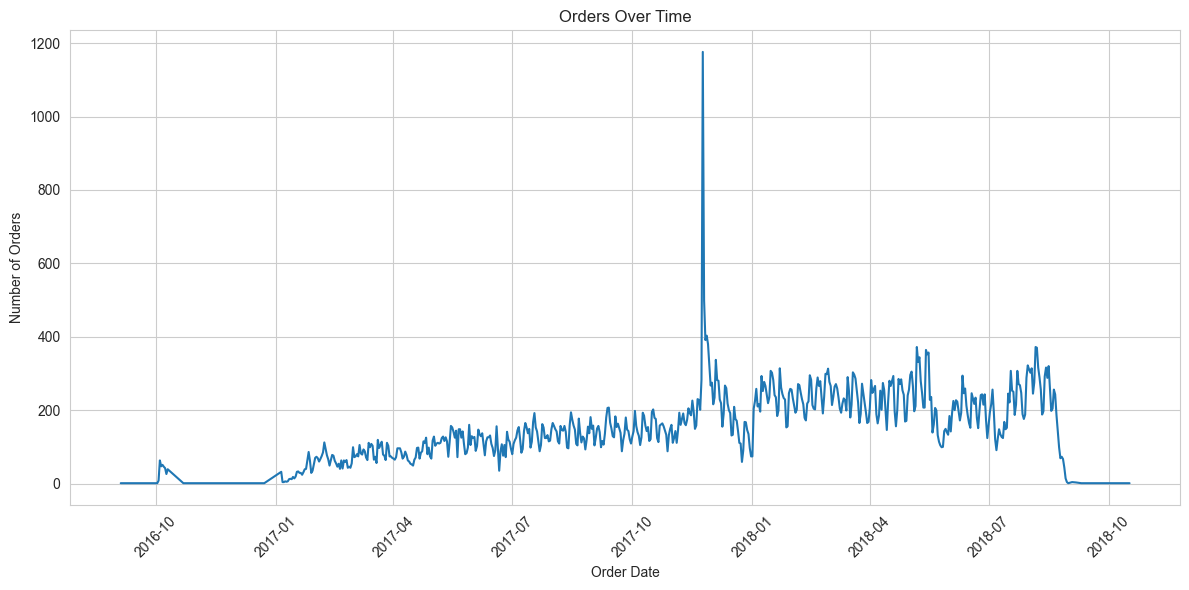

In [7]:
query = f"""
SELECT
DATE(order_purchase_timestamp) as order_date,
COUNT(*) AS num_orders
FROM `{project_id}.marketplace_ab_test.orders`
GROUP BY order_date
ORDER BY order_date
"""

df_orders = client.query(query).to_dataframe()

sns.lineplot(data=df_orders, x="order_date", y="num_orders")
plt.title("Orders Over Time")
plt.xlabel("Order Date")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top Product Categories

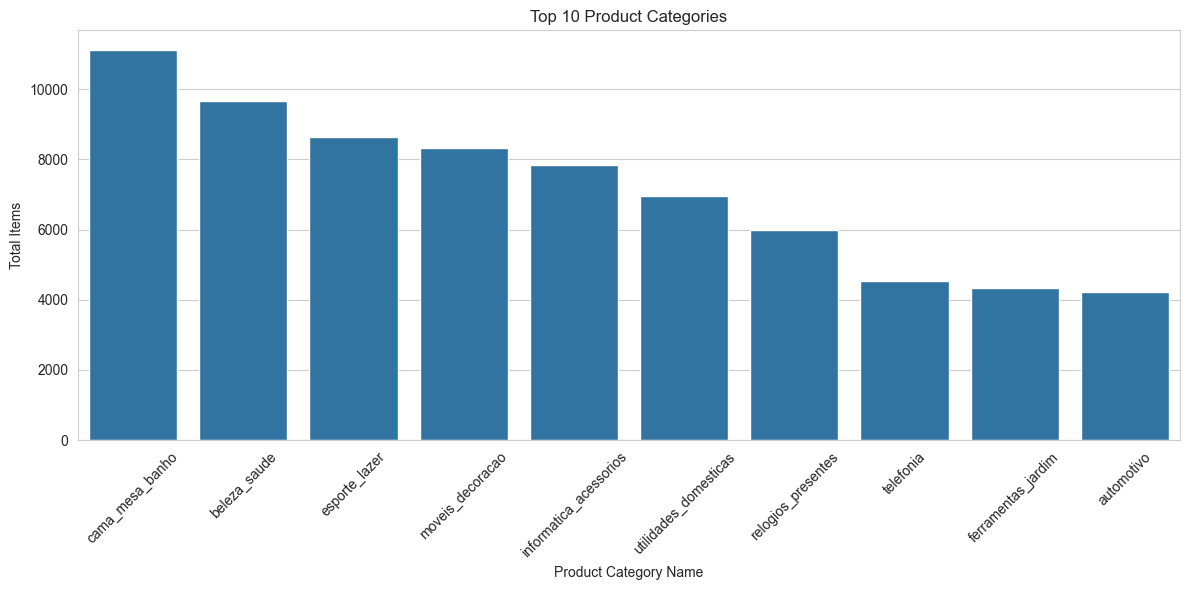

In [11]:
query = f"""
SELECT
p.product_category_name,
COUNT(*) as total_items
FROM `{project_id}.marketplace_ab_test.order_items` oi
JOIN `{project_id}.marketplace_ab_test.products` p
ON oi.product_id = p.product_id
GROUP BY product_category_name
ORDER BY total_items DESC
LIMIT 10
"""

df_categories = client.query(query).to_dataframe()

sns.barplot(data=df_categories, x="product_category_name", y="total_items")
plt.title("Top 10 Product Categories")
plt.xlabel("Product Category Name")
plt.ylabel("Total Items")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Average Payment Value Distribution

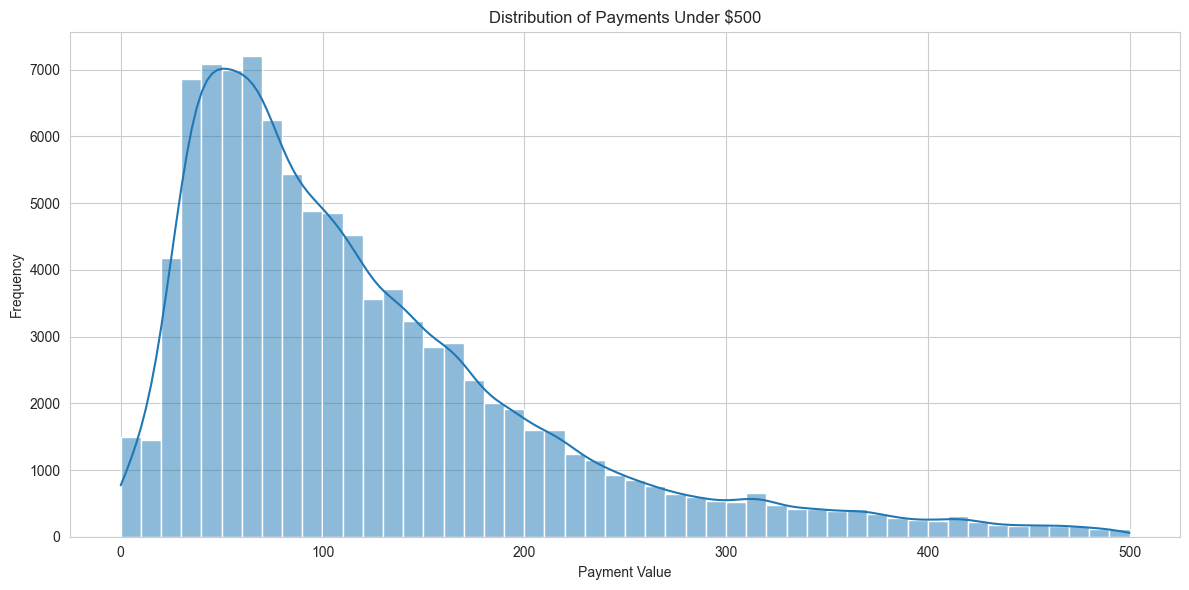

In [12]:
query = f"""
SELECT payment_value FROM `{project_id}.marketplace_ab_test.payments`
WHERE payment_value < 500
"""
df_payment = client.query(query).to_dataframe()

sns.histplot(data=df_payment, x="payment_value", bins=50, kde=True)
plt.title("Distribution of Payments Under $500")
plt.xlabel("Payment Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


### Top States by order Volume

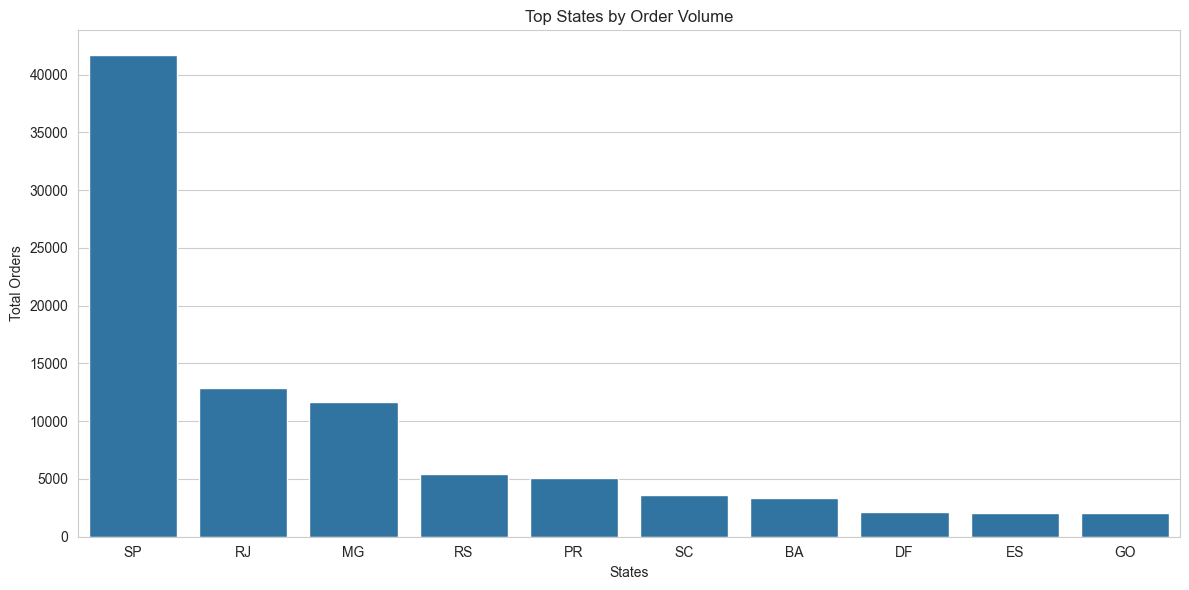

In [13]:
query = f"""
SELECT
c.customer_state,
COUNT(*) as total_orders
FROM `{project_id}.marketplace_ab_test.orders` o
JOIN `{project_id}.marketplace_ab_test.customers` c
ON o.customer_id = c.customer_id
GROUP BY c.customer_state
ORDER BY total_orders DESC
LIMIT 10
"""

df_states = client.query(query).to_dataframe()

sns.barplot(data=df_states, x="customer_state", y="total_orders")
plt.title("Top States by Order Volume")
plt.xlabel("States")
plt.ylabel("Total Orders")
plt.tight_layout()
plt.show()

### Seller Locations and Freight Cost

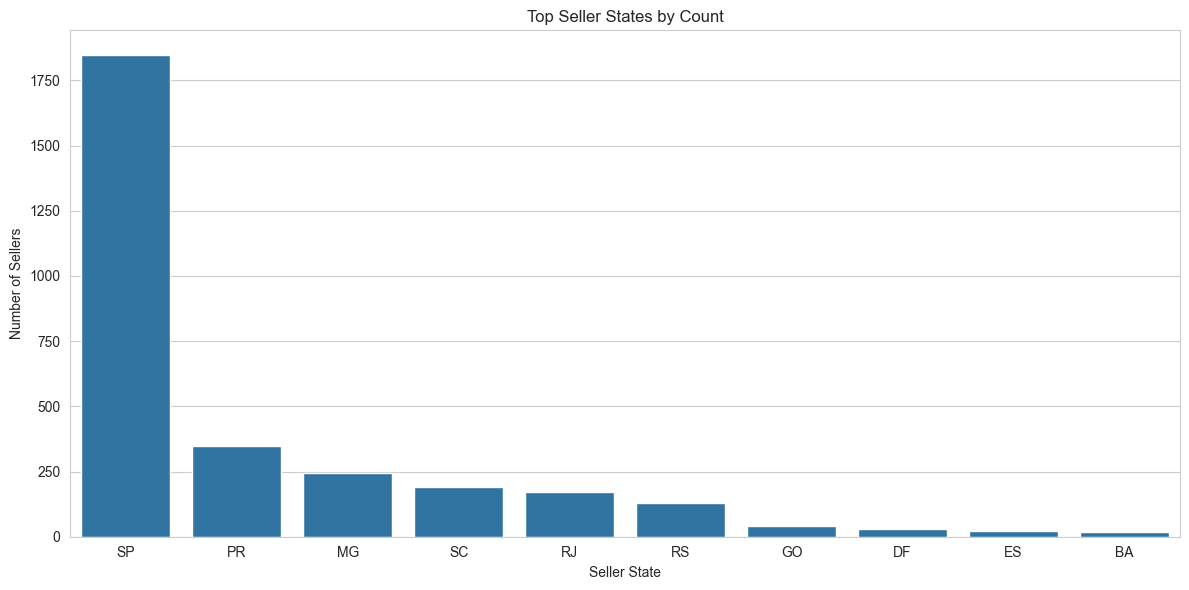

In [14]:
query = f"""
SELECT
  s.seller_state,
  COUNT(DISTINCT s.seller_id) AS seller_count,
  ROUND(AVG(oi.freight_value), 2) AS avg_freight_cost
FROM `{project_id}.marketplace_ab_test.sellers` s
JOIN `{project_id}.marketplace_ab_test.order_items` oi
  ON s.seller_id = oi.seller_id
GROUP BY seller_state
ORDER BY seller_count DESC
LIMIT 10
"""
df_sellers = client.query(query).to_dataframe()

sns.barplot(data=df_sellers, x="seller_state", y="seller_count")
plt.title("Top Seller States by Count")
plt.xlabel("Seller State")
plt.ylabel("Number of Sellers")
plt.tight_layout()
plt.show()

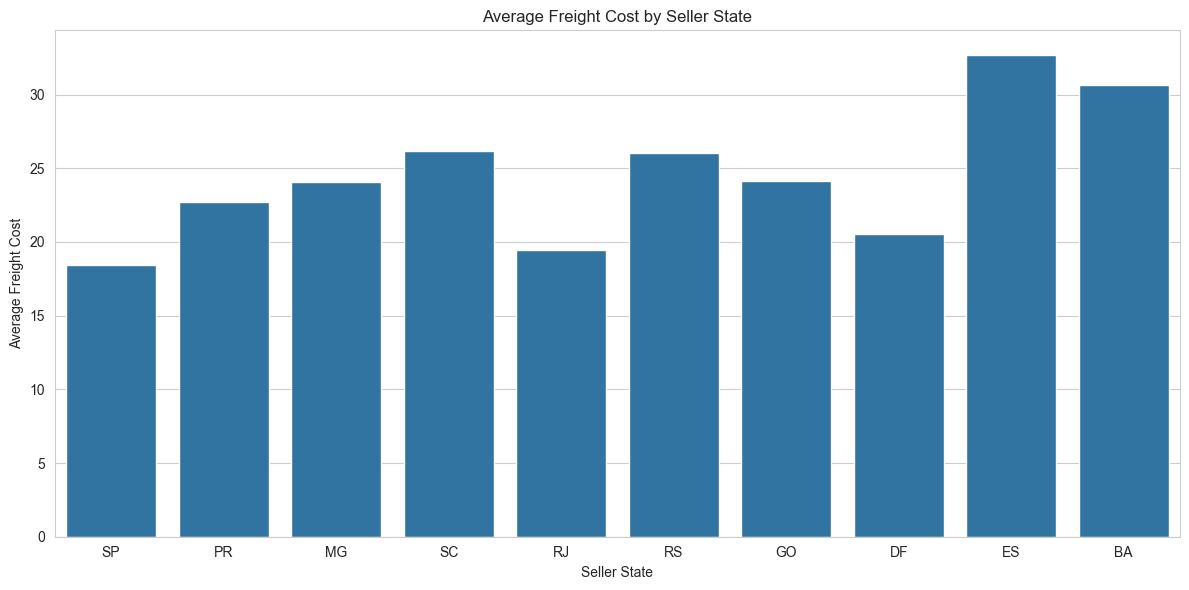

In [15]:
sns.barplot(data=df_sellers, x="seller_state", y="avg_freight_cost")
plt.title("Average Freight Cost by Seller State")
plt.xlabel("Seller State")
plt.ylabel("Average Freight Cost")
plt.tight_layout()
plt.show()

### Product Physical Attributes (Weight Distribution)

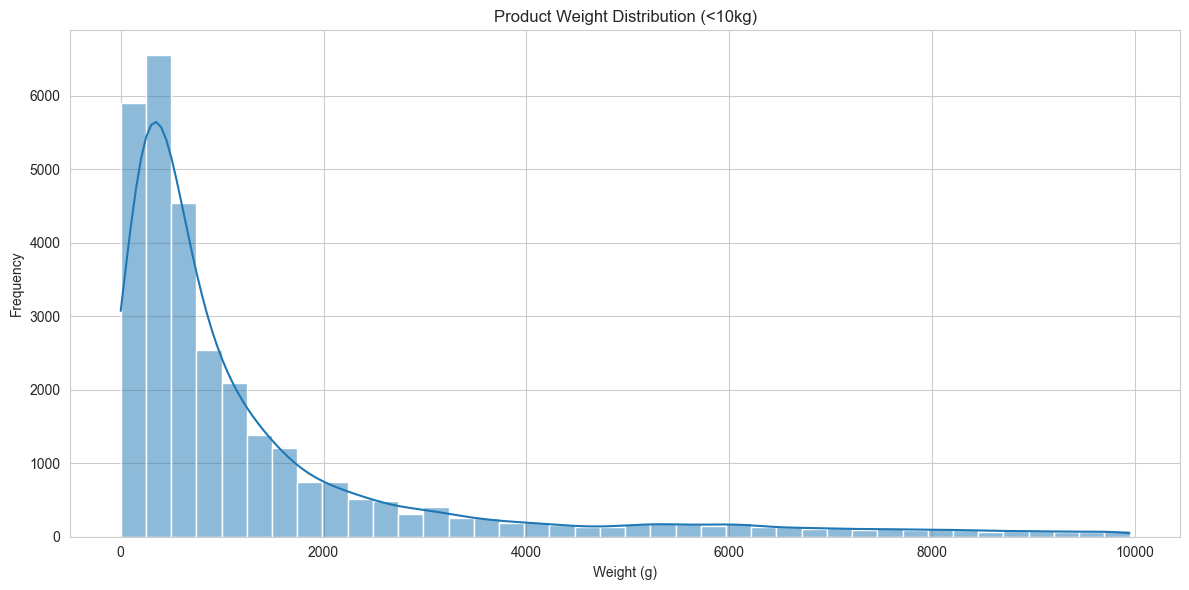

In [16]:
query = f"""
SELECT
  product_weight_g
FROM `{project_id}.marketplace_ab_test.products`
WHERE product_weight_g < 10000
"""
df_weight = client.query(query).to_dataframe()
sns.histplot(df_weight["product_weight_g"], bins=40, kde=True)
plt.title("Product Weight Distribution (<10kg)")
plt.xlabel("Weight (g)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Review Score Distribution

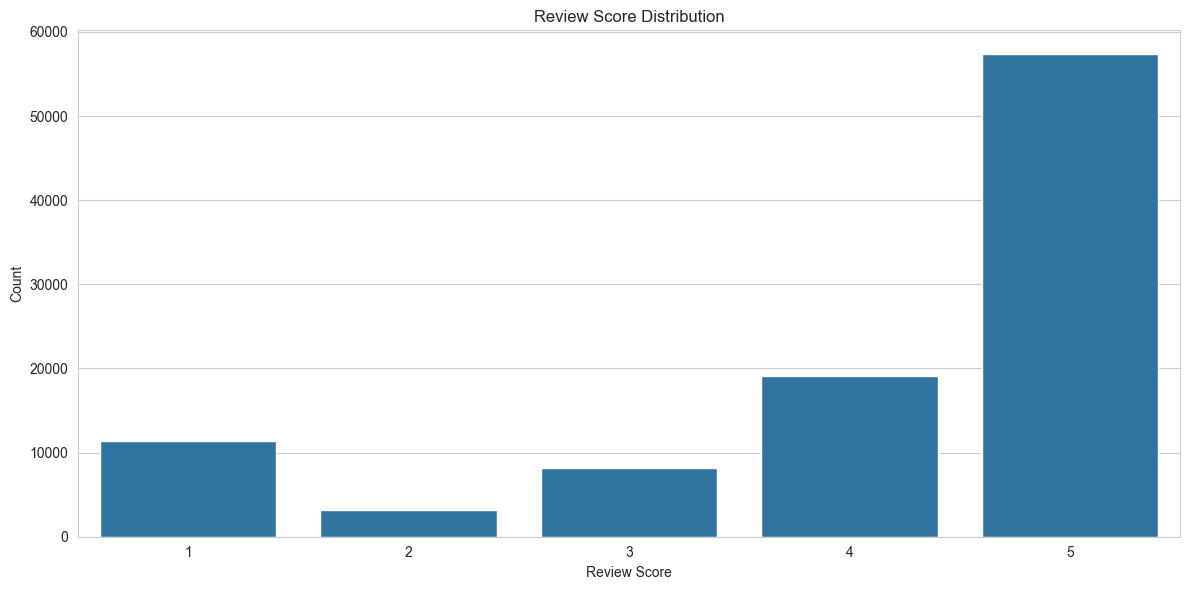

In [17]:
query = f"""
SELECT review_score FROM `{project_id}.marketplace_ab_test.reviews`
"""
df_reviews = client.query(query).to_dataframe()

sns.countplot(data=df_reviews, x="review_score")
plt.title("Review Score Distribution")
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()